# SIT 720 - Machine Learning

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

## Assessment Task 5 (35 marks)

In this assignment, you will use a lot of concepts learnt in this course to come up with a good solution for a given chronic kidney disease prediction problem.

## Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum ten sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A5_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
# Student ID: 219380205

# Student name: Hoang Manh Nguyen

##The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
1.  Age(numerical): age in years
2.Blood Pressure (numerical): bp in mm/Hg
3.Specific Gravity (categorical): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin (categorical): al - (0,1,2,3,4,5)
5.Sugar (categorical): su - (0,1,2,3,4,5)
6.Red Blood Cells (categorial): rbc - (0, 1)
7.Pus Cell (categorical): pc - (0, 1)
8.Pus Cell clumps (categorical): pcc - (0, 1)
9.Bacteria (categorical): ba - (0, 1)
10.Blood Glucose Random (numerical): bgr in mgs/dl
11.Blood Urea (numerical): bu in mgs/dl
12.Serum Creatinine (numerical): sc in mgs/dl
13.Sodium (numerical): sod in mEq/L
14.Potassium (numerical): pot in mEq/L
15.Hemoglobin (numerical): hemo in gms
16.Packed Cell Volume (numerical)
17.White Blood Cell Count (numerical): wc in cells/cumm
18.Red Blood Cell Count (numerical): rc in millions/cmm
19.Hypertension (categorical): htn - (0, 1)
20.Diabetes Mellitus (categorical): dm - (0, 1)
21.Coronary Artery Disease (categorical): cad - (0, 1)
22.Appetite (categorical): appet - (0, 1)
23.Pedal Edema (categorical): pe - (0, 1)
24.Anemia (categorical): ane - (0, 1)
25.Class (categorical): class - (ckd, notckd)


## Part 1: Short questions: **(6 marks)**




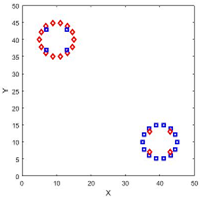


1.  For the above figure, what value of k in KNN method will give the best accuracy for leave-one-out cross-validation. Report accuracy and k value. **(3 marks)**

In [2]:
print('Leave one out cross validation: hold each data point out in turn as a single test data, fit our model on the remaining, and then test on how to classify the held out data point.')
print('if k is even number, such as 2NN 4NN, there are some point can not be classified -> not the best k.')
print('if k=1, for 1NN, error = 24/36, accuracy = 12/36 -> not the best k.')
print('if k=3, for 3NN, error = 8/36, accuracy = 28/36 = 0.77777 or 77.78%.')
print('if k>3 and odd number, such as 5NN 7NN, give the same result as k=3.')
print('Therefore, the best k = 3 and accuracy = 28/36 = 0.77777 or 77.78%.')

Leave one out cross validation: hold each data point out in turn as a single test data, fit our model on the remaining, and then test on how to classify the held out data point.
if k is even number, such as 2NN 4NN, there are some point can not be classified -> not the best k.
if k=1, for 1NN, error = 24/36, accuracy = 12/36 -> not the best k.
if k=3, for 3NN, error = 8/36, accuracy = 28/36 = 0.77777 or 77.78%.
if k>3 and odd number, such as 5NN 7NN, give the same result as k=3.
Therefore, the best k = 3 and accuracy = 28/36 = 0.77777 or 77.78%.


2.  In classification, overfitting and underfitting is a big problem. Does it happen in Random Forest or not? Why? **(3 marks)**

In [3]:
print('Random Forest can overfit or underfit.')
print('- Depth of tree can cause overfit. As increase tree depth, model can perfectly predicts all train data, however, it fails to generalize the findings for new data.')
print('- Random forest with only 1 tree can overfit data as the same as single decision tree. Usually the higher the number of trees, the better to learn the data. However, adding a lot of trees can slow down the training process.')
print('- Generalization error variance decreases when more trees are added. However, the bias of generalization does not change. Overfitting stabilizes by adding more trees.')
print('- Underfitting: Min_samples_split represents the minimum number of samples required to split an internal node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. when we require all of the samples at each node, the model cannot learn enough about the data.')
print('- Underfitting: min_samples_leaf describes the minimum number of samples of samples at the leafs, the base of the tree. Increasing this value can cause underfitting.')

Random Forest can overfit or underfit.
- Depth of tree can cause overfit. As increase tree depth, model can perfectly predicts all train data, however, it fails to generalize the findings for new data.
- Random forest with only 1 tree can overfit data as the same as single decision tree. Usually the higher the number of trees, the better to learn the data. However, adding a lot of trees can slow down the training process.
- Generalization error variance decreases when more trees are added. However, the bias of generalization does not change. Overfitting stabilizes by adding more trees.
- Underfitting: Min_samples_split represents the minimum number of samples required to split an internal node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. when we require all of the samples at each node, the model cannot learn enough about the data.
- Underfitting: min_samples_leaf describes the minimum number of sampl

## Part 2: **(24 marks = 4 methods x 6)**

Using the following four supervised machine learning methods, answer questions(A-D).
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest

**A.**  Build optimised classification model to predict the chronic kidney disease from the dataset. **(1 marks)**

**B.** For each optimised model, answer the followings -  **(3 marks)**

*  which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]

*  what set or range of values were used for each hyperparameter?

*  which metric was used to measure the performance?

*  justify your design decisions.

**C.**  Plot the prediction performance against hyperparameter values to visualise the optimisation process and mark the optimal value. **(1 marks)**

**D.** Evaluate the model (obtained from A) performance on the test set. Report the confusion matrix, F1-score and accuracy. **(1 marks)**

In [4]:
#################################### Data Preparation ################################################
# Import packages
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Read CSV
a5 = pd.read_csv('chronic_kidney_disease.csv')

# Replace "?" in all columns with "np.NaN" to present missing values
print('Columns except "class", which are "object" type, have missing values presented by "?".')
print()
a5 = a5.replace("?", np.nan)
a5.info()

Columns except "class", which are "object" type, have missing values presented by "?".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    object 
 1   bp      388 non-null    object 
 2   sg      353 non-null    object 
 3   al      354 non-null    object 
 4   su      351 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     356 non-null    object 
 10  bu      381 non-null    object 
 11  sc      383 non-null    object 
 12  sod     313 non-null    object 
 13  pot     312 non-null    object 
 14  hemo    348 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    i

In [5]:
# Transform the target "Class" to binary. Replace ckd = 1 and notckd = 0
a5['class'].value_counts()
a5['class']=a5['class'].map({'ckd':1,'notckd':0})

# Create train and test set: 
train = a5.drop(['class'],axis=1)
test = a5['class']

# Split train and test: 70% train and 30% test
trainX, testX, trainy, testy = train_test_split(train, test, test_size =0.3, random_state=10)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(280, 24)
(280,)
(120, 24)
(120,)


In [6]:
#################################### Model Development ############################################

In [7]:
########### Support Vector Machine ############

In [8]:
#### Question A ####

## Create model SVM optimisation with GridsearchCV
# Create pipe
pipe0 = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', KNNImputer()),
        ('SVM', svm.SVC())])

# Parameters
hyperpara0 = {'SVM__C': [0.001, 0.01, 0.1, 1, 10], 
          'SVM__gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
          'SVM__kernel': ['linear','rbf','poly'],
        'SVM__degree': [1, 2, 3, 4, 5]}

# Optimization
SVM = GridSearchCV(pipe0, param_grid=hyperpara0, scoring='accuracy', cv=5)
SVM.fit(trainX,trainy)

# CV results summary
print('Cross-Validation result:')
print('Best parameters:', SVM.best_params_)
print('Best mean CV accuracy of the best_estimator:', SVM.best_score_)

Cross-Validation result:
Best parameters: {'SVM__C': 0.1, 'SVM__degree': 3, 'SVM__gamma': 0.1, 'SVM__kernel': 'poly'}
Best mean CV accuracy of the best_estimator: 0.9821428571428571


In [9]:
#### Question B ####
print('Chosen SVM hyperparameters: C, kernel, gamma and degree for only poly')
print()
print('Set or range of values for each hyperparameter:')
print('-C: 0.001, 0.01, 0.1, 1, 10')
print('-gamma: 10, 1, 0.1, 0.01, 0.001, 0.0001')
print('-kernel: linear,rbf,poly')
print('-degree: 1, 2, 3, 4, 5')
print()
print('Metric for performance: accuracy')
print()
print('Justify your design decisions:')
print('-Split data into training and test data')
print('-Transform training data by StandardScaler, then impute missing values by KNNimputer because all data are integer or float.')
print('-Set Pipeline: StandardScaler, KNNImputer and SVM, so we can apply the same worklow to test data after optimization.')
print('-Optimize the pipeline and hyper parameters by GridsearchCV, scoring = accuracy.')
print('-Chosen hyper parameters with different set or range values are most important parameters which affect model performance.')

Chosen SVM hyperparameters: C, kernel, gamma and degree for only poly

Set or range of values for each hyperparameter:
-C: 0.001, 0.01, 0.1, 1, 10
-gamma: 10, 1, 0.1, 0.01, 0.001, 0.0001
-kernel: linear,rbf,poly
-degree: 1, 2, 3, 4, 5

Metric for performance: accuracy

Justify your design decisions:
-Split data into training and test data
-Transform training data by StandardScaler, then impute missing values by KNNimputer because all data are integer or float.
-Set Pipeline: StandardScaler, KNNImputer and SVM, so we can apply the same worklow to test data after optimization.
-Optimize the pipeline and hyper parameters by GridsearchCV, scoring = accuracy.
-Chosen hyper parameters with different set or range values are most important parameters which affect model performance.


Text(0.5, 1.0, 'SVM-CVperformance')

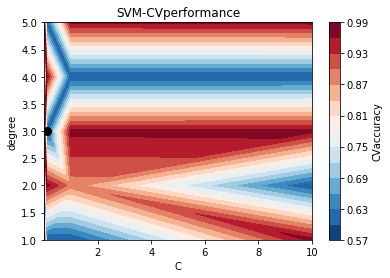

In [10]:
#### Question C ####
# Create CV results, including: hyper parameters and accuracy
SVMresult= pd.DataFrame(SVM.cv_results_['params'])
SVMresult['CVaccuracy'] = SVM.cv_results_['mean_test_score']
SVMresult = SVMresult.rename({'SVM__C': 'C','SVM__degree':'degree','SVM__gamma': 'gamma','SVM__kernel': 'kernel'}, axis=1)

## Plot
fig, ax = plt.subplots()
# Mark the optimal value
ax.plot(0.1, 3, "ko", ms=8)
# Create heatmap
cntr = ax.tricontourf(SVMresult['C'], SVMresult['degree'], SVMresult['CVaccuracy'], levels=12, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax, label="CVaccuracy")
ax.set(
    xlim=(min(SVMresult['C']), max(SVMresult['C'])),
    ylim=(min(SVMresult['degree']), max(SVMresult['degree'])),
    xlabel="C",
    ylabel="degree")
ax.set_title("SVM-CVperformance")

Best parameters: {'SVM__C': 0.1, 'SVM__degree': 3, 'SVM__gamma': 0.1, 'SVM__kernel': 'poly'}
Best mean CV accuracy of the best_estimator: 0.9821428571428571

Performance on test set:
Accuracy: 0.975 - model can predict 97.5% correctly.
Accuracy of CVperformance-0.982 is higher than that of test performance-0.975: slightly overfitting.
F1: 0.9820359281437125 - weighted average of the precision and recall values is 0.982.

Confusion matrix:


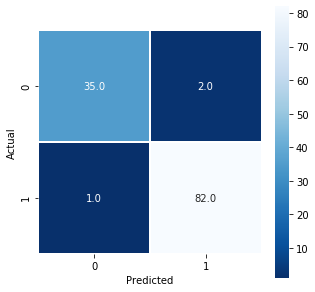

In [11]:
#### Question D ####

print('Best parameters:', SVM.best_params_)
print('Best mean CV accuracy of the best_estimator:', SVM.best_score_)
# Performance on test set
SVMpred = SVM.predict(testX)
print()
print('Performance on test set:')
print('Accuracy:', accuracy_score(testy,SVMpred),'- model can predict 97.5% correctly.')
print('Accuracy of CVperformance-0.982 is higher than that of test performance-0.975: slightly overfitting.')
print('F1:', f1_score(testy,SVMpred),'- weighted average of the precision and recall values is 0.982.')
print()
# Plot confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(testy,SVMpred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [12]:
########### K-Nearest Neighbour ############

In [13]:
#### Question A ####

###### Create model KNN optimisation with GridsearchCV
# Create pipe
pipe1 = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', KNNImputer()),
        ('KNN', KNeighborsClassifier())
        ])

# Parameters
hyperpara1 = {'KNN__n_neighbors':list(range(1,31)),
            'KNN__p': [1, 2],
            'KNN__weights':['uniform', 'distance']}
                            
# Optimization
KNN = GridSearchCV(pipe1, param_grid=hyperpara1, scoring='accuracy', cv=5)
KNN.fit(trainX,trainy)

# CV results summary
print('Cross-Validation result:')
print('Best parameters:', KNN.best_params_)
print('Best mean CV accuracy of the best_estimator:', KNN.best_score_)

Cross-Validation result:
Best parameters: {'KNN__n_neighbors': 8, 'KNN__p': 2, 'KNN__weights': 'distance'}
Best mean CV accuracy of the best_estimator: 0.9571428571428571


In [14]:
#### Question B ####
print('Chosen KNN hyperparameters: n_neighbor, p and weights')
print()
print('Set or range of values for each hyperparameter:')
print('-n_neighbor: from 1 to 31')
print('-p: 1-Manhattan or 2-Euclidean')
print('-weights: uniform, distance')
print()
print('Metric for performance: accuracy')
print()
print('Justify your design decisions:')
print('-Split data into training and test data')
print('-Transform training data by StandardScaler, then impute missing values by KNNimputer because all data are integer or float.')
print('-Set Pipeline: StandardScaler, KNNImputer and KNeighborsClassifier, so we can apply the same worklow to test data after optimization.')
print('-Optimize the pipeline and hyper parameters by GridsearchCV, scoring = accuracy.')
print('-Chosen hyper parameters with different set or range values are most important parameters which affect model performance.')

Chosen KNN hyperparameters: n_neighbor, p and weights

Set or range of values for each hyperparameter:
-n_neighbor: from 1 to 31
-p: 1-Manhattan or 2-Euclidean
-weights: uniform, distance

Metric for performance: accuracy

Justify your design decisions:
-Split data into training and test data
-Transform training data by StandardScaler, then impute missing values by KNNimputer because all data are integer or float.
-Set Pipeline: StandardScaler, KNNImputer and KNeighborsClassifier, so we can apply the same worklow to test data after optimization.
-Optimize the pipeline and hyper parameters by GridsearchCV, scoring = accuracy.
-Chosen hyper parameters with different set or range values are most important parameters which affect model performance.


Text(0.5, 1.0, 'KNN-CVperformance')

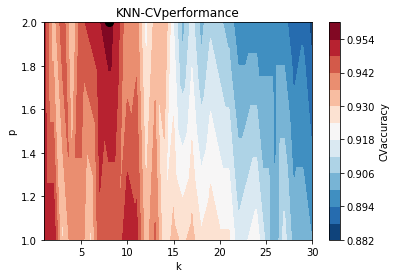

In [15]:
#### Question C ####
# Create CV results, including: hyper parameters and accuracy
KNNresult= pd.DataFrame(KNN.cv_results_['params'])
KNNresult['CVaccuracy'] = KNN.cv_results_['mean_test_score']
KNNresult = KNNresult.rename({'KNN__n_neighbors': 'k','KNN__p':'p','KNN__weights': 'weights'}, axis=1)

## Plot
fig, ax = plt.subplots()
# Mark the optimal value
ax.plot(8, 2, "ko", ms=8)
# Create heatmap
cntr = ax.tricontourf(KNNresult['k'], KNNresult['p'], KNNresult['CVaccuracy'], levels=12, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax, label="CVaccuracy")
ax.set(
    xlim=(min(KNNresult['k']), max(KNNresult['k'])),
    ylim=(min(KNNresult['p']), max(KNNresult['p'])),
    xlabel="k",
    ylabel="p")
ax.set_title("KNN-CVperformance")

Best parameters: {'KNN__n_neighbors': 8, 'KNN__p': 2, 'KNN__weights': 'distance'}
Best mean CV accuracy of the best_estimator: 0.9571428571428571

Performance on test set:
Accuracy: 0.95 - model can predict 95% correctly.
Accuracy of CVperformance-0.957 is higher than that of test performance-0.95: slightly overfitting.
F1: 0.962962962962963 - weighted average of the precision and recall values is 0.962.

Confusion matrix:


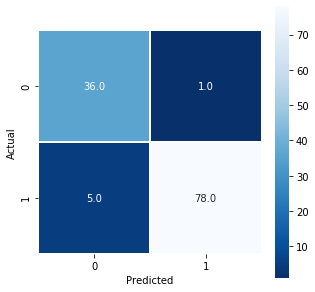

In [16]:
#### Question D ####

print('Best parameters:', KNN.best_params_)
print('Best mean CV accuracy of the best_estimator:', KNN.best_score_)
print()

# Performance on test set
KNNpred = KNN.predict(testX)
print('Performance on test set:')
print('Accuracy:', accuracy_score(testy,KNNpred), '- model can predict 95% correctly.')
print('Accuracy of CVperformance-0.957 is higher than that of test performance-0.95: slightly overfitting.')
print('F1:', f1_score(testy,KNNpred), '- weighted average of the precision and recall values is 0.962.')
print()
# Plot confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(testy,KNNpred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [17]:
########### Decision Tree ############

In [18]:
#### Question A ####

# Create pipe
pipe2 = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', KNNImputer()),
        ('DT', DecisionTreeClassifier(random_state=1))
        ])

# Parameters
hyperpara2 = {'DT__criterion': ['gini', 'entropy'],
             'DT__max_depth': [1,2,3,4,5],
             'DT__min_samples_split': [2,3,4,5,6],
             'DT__min_samples_leaf':[1,2,3,4,5]}
                            
# Optimization
Dtree = GridSearchCV(pipe2, param_grid=hyperpara2, scoring='accuracy', cv=5)
Dtree.fit(trainX,trainy)

# CV results summary
print('Cross-Validation result:')
print('Best parameters:', Dtree.best_params_)
print('Best mean CV accuracy of the best_estimator:', Dtree.best_score_)

Cross-Validation result:
Best parameters: {'DT__criterion': 'gini', 'DT__max_depth': 2, 'DT__min_samples_leaf': 4, 'DT__min_samples_split': 2}
Best mean CV accuracy of the best_estimator: 0.9714285714285713


In [19]:
#### Question B ####
print('Chosen Decision tree hyperparameters: criterion, max_depth, min_samples_split and min_samples_leaf.')
print()
print('Set or range of values for each hyperparameter:')
print('-criterion : gini, entropy')
print('-max_depth: 1,2,3,4,5')
print('-min_samples_split: 2,3,4,5,6')
print('-min_samples_leaf:1,2,3,4,5')
print()
print('Metric for performance: accuracy')
print()
print('Justify your design decisions:')
print('-Split data into training and test data')
print('-Transform training data by StandardScaler, then impute missing values by KNNimputer because all data are integer or float.')
print('-Set Pipeline: StandardScaler, KNNImputer and DecisionTreeClassifier, so we can apply the same worklow to test data after optimization.')
print('-Optimize the pipeline and hyper parameters by GridsearchCV, scoring = accuracy.')
print('-Chosen hyper parameters with different set or range values are most important parameters which affect model performance.')

Chosen Decision tree hyperparameters: criterion, max_depth, min_samples_split and min_samples_leaf.

Set or range of values for each hyperparameter:
-criterion : gini, entropy
-max_depth: 1,2,3,4,5
-min_samples_split: 2,3,4,5,6
-min_samples_leaf:1,2,3,4,5

Metric for performance: accuracy

Justify your design decisions:
-Split data into training and test data
-Transform training data by StandardScaler, then impute missing values by KNNimputer because all data are integer or float.
-Set Pipeline: StandardScaler, KNNImputer and DecisionTreeClassifier, so we can apply the same worklow to test data after optimization.
-Optimize the pipeline and hyper parameters by GridsearchCV, scoring = accuracy.
-Chosen hyper parameters with different set or range values are most important parameters which affect model performance.


Text(0.5, 1.0, 'DT-CVperformance')

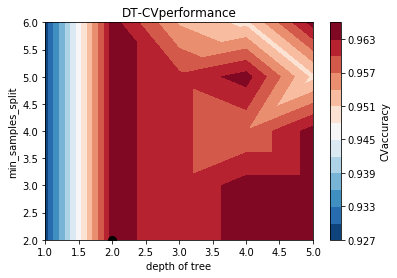

In [20]:
#### Question C ####
# Create CV results, including: hyper parameters and accuracy
DTreeresult= pd.DataFrame(Dtree.cv_results_['params'])
DTreeresult['CVaccuracy'] = Dtree.cv_results_['mean_test_score']
DTreeresult = DTreeresult.rename({'DT__criterion': 'criterion','DT__max_depth':'depth of tree','DT__min_samples_split': 'min_samples_split','DT__min_samples_leaf':'min_samples_leaf'}, axis=1)

## Plot
fig, ax = plt.subplots()
# Mark the optimal value
ax.plot(2, 2, "ko", ms=8)
# Create heatmap
cntr = ax.tricontourf(DTreeresult['depth of tree'], DTreeresult['min_samples_split'],DTreeresult['CVaccuracy'], levels=12, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax, label="CVaccuracy")
ax.set(
    xlim=(min(DTreeresult['depth of tree']), max(DTreeresult['depth of tree'])),
    ylim=(min(DTreeresult['min_samples_split']), max(DTreeresult['min_samples_split'])),
    xlabel="depth of tree",
    ylabel="min_samples_split")
ax.set_title("DT-CVperformance")

Best parameters: {'DT__criterion': 'gini', 'DT__max_depth': 2, 'DT__min_samples_leaf': 4, 'DT__min_samples_split': 2}
Best mean CV accuracy of the best_estimator: 0.9714285714285713

Performance on test set:
Accuracy: 0.9833333333333333 - model can predict 98.33% correctly.
Accuracy of CVperformance-0.971 is lower than that of test performance-0.983: slightly underfitting.
F1: 0.988095238095238 - weighted average of the precision and recall values is 0.988.

Confusion matrix:


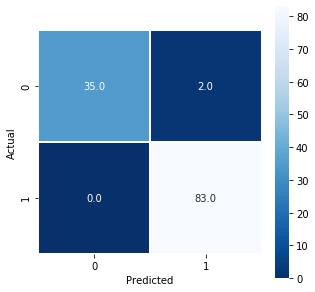

In [21]:
#### Question D ####

print('Best parameters:', Dtree.best_params_)
print('Best mean CV accuracy of the best_estimator:', Dtree.best_score_)
print()

# Performance on test set
Dtreepred = Dtree.predict(testX)
print('Performance on test set:')
print('Accuracy:', accuracy_score(testy,Dtreepred), '- model can predict 98.33% correctly.')
print('Accuracy of CVperformance-0.971 is lower than that of test performance-0.983: slightly underfitting.')
print('F1:', f1_score(testy,Dtreepred), '- weighted average of the precision and recall values is 0.988.')
print()
# Plot confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(testy,Dtreepred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [22]:
########### Random Forest ############

In [23]:
#### Question A ####

# Create pipe
pipe3 = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', KNNImputer()),
        ('RF', RandomForestClassifier(random_state=1))
        ])

# Parameters
hyperpara3 = {'RF__criterion':['gini','entropy'],
          'RF__n_estimators':[100],
          'RF__max_depth': [1,2,3,4,5],
          'RF__min_samples_split': [2,3,4,5,6],
          'RF__min_samples_leaf':[1,2,3,4,5]}
                            
# Optimization
RF = GridSearchCV(pipe3, param_grid=hyperpara3, scoring = 'accuracy', cv=5)
RF.fit(trainX,trainy)

# CV results summary
print('Cross-Validation result:')
print('Best parameters:', RF.best_params_)
print('Best mean CV accuracy of the best_estimator:', RF.best_score_)

Cross-Validation result:
Best parameters: {'RF__criterion': 'gini', 'RF__max_depth': 3, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
Best mean CV accuracy of the best_estimator: 0.9857142857142858


In [24]:
#### Question B ####
print('Chosen Random Forest hyperparameters: criterion, n_estimators, max_depth, min_samples_split and min_samples_leaf.')
print()
print('Set or range of values for each hyperparameter:')
print('-criterion : gini, entropy')
print('-n_estimators: 100')
print('-max_depth: 1,2,3,4,5')
print('-min_samples_split: 2,3,4,5,6')
print('-min_samples_leaf:1,2,3,4,5')
print()
print('Metric for performance: accuracy')
print()
print('Justify your design decisions:')
print('-Split data into training and test data')
print('-Transform training data by StandardScaler, then impute missing values by KNNimputer because all data are integer or float.')
print('-Set Pipeline: StandardScaler, KNNImputer and RandomForestClassifier, so we can apply the same worklow to test data after optimization.')
print('-Optimize the pipeline and hyper parameters by GridsearchCV, scoring = accuracy.')
print('-Chosen hyper parameters with different set or range values are most important parameters which affect model performance.')

Chosen Random Forest hyperparameters: criterion, n_estimators, max_depth, min_samples_split and min_samples_leaf.

Set or range of values for each hyperparameter:
-criterion : gini, entropy
-n_estimators: 100
-max_depth: 1,2,3,4,5
-min_samples_split: 2,3,4,5,6
-min_samples_leaf:1,2,3,4,5

Metric for performance: accuracy

Justify your design decisions:
-Split data into training and test data
-Transform training data by StandardScaler, then impute missing values by KNNimputer because all data are integer or float.
-Set Pipeline: StandardScaler, KNNImputer and RandomForestClassifier, so we can apply the same worklow to test data after optimization.
-Optimize the pipeline and hyper parameters by GridsearchCV, scoring = accuracy.
-Chosen hyper parameters with different set or range values are most important parameters which affect model performance.


Text(0.5, 1.0, 'RF-CVperformance')

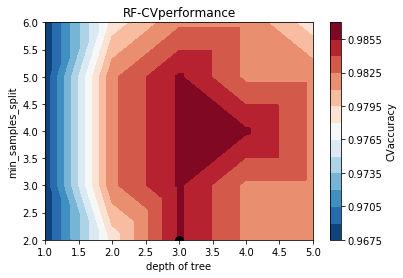

In [25]:
#### Question C ####
# Create CV results, including: hyper parameters and accuracy
RFresult= pd.DataFrame(RF.cv_results_['params'])
RFresult['CVaccuracy'] = RF.cv_results_['mean_test_score']
RFresult = RFresult.rename({'RF__criterion': 'criterion','RF__max_depth':'depth of tree','RF__min_samples_split': 'min_samples_split','RF__min_samples_leaf':'min_samples_leaf'}, axis=1)

## Plot
fig, ax = plt.subplots()
# Mark the optimal value
ax.plot(3, 2, "ko", ms=8)
# Create heatmap
cntr = ax.tricontourf(RFresult['depth of tree'], RFresult['min_samples_split'],RFresult['CVaccuracy'], levels=12, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax, label="CVaccuracy")
ax.set(
    xlim=(min(RFresult['depth of tree']), max(RFresult['depth of tree'])),
    ylim=(min(RFresult['min_samples_split']), max(RFresult['min_samples_split'])),
    xlabel="depth of tree",
    ylabel="min_samples_split")
ax.set_title("RF-CVperformance")

Best parameters: {'RF__criterion': 'gini', 'RF__max_depth': 3, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
Best mean CV accuracy of the best_estimator: 0.9857142857142858

Performance on test set:
Accuracy: 0.9833333333333333 - model can predict 98.33% correctly.
Accuracy of CVperformance-0.985 is higher than that of test performance-0.983: slightly overfitting.
F1: 0.9879518072289156 - weighted average of the precision and recall values is 0.988.

Confusion matrix:


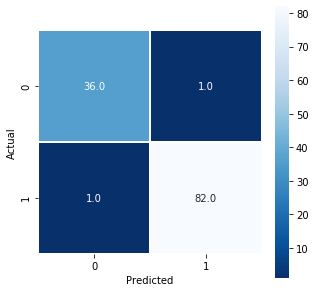

In [26]:
#### Question D ####

print('Best parameters:', RF.best_params_)
print('Best mean CV accuracy of the best_estimator:', RF.best_score_)
print()
# Performance on test set
RFpred = RF.predict(testX)
print('Performance on test set:')
print('Accuracy:', accuracy_score(testy,RFpred), '- model can predict 98.33% correctly.')
print('Accuracy of CVperformance-0.985 is higher than that of test performance-0.983: slightly overfitting.')
print('F1:', f1_score(testy,RFpred), '- weighted average of the precision and recall values is 0.988.')
print()
# Plot confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(testy,RFpred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');

## Part 3: Discussion **(5 marks)**

Based on the results obtained in Part-2, which classification method showed the best performance and why? Do you have any suggestions to further improve the model performances? **(5 marks)**

In [30]:
Performance_result= [{'Model': 'SVM' ,'Accuracy': accuracy_score(testy,SVMpred), 'F1':f1_score(testy,SVMpred)},
          {'Model':'KNN','Accuracy': accuracy_score(testy,KNNpred), 'F1': f1_score(testy,KNNpred)},
        {'Model':'DT','Accuracy': accuracy_score(testy,Dtreepred), 'F1': f1_score(testy,Dtreepred)},
        {'Model':'RF','Accuracy': accuracy_score(testy,RFpred), 'F1': f1_score(testy,RFpred)}]
df = pd.DataFrame(Performance_result)
print(df)
print()
print('Based on performance result, Random Forest is the best classification model with highest accuracy and F1.')
print('Having the same accuracy, Decision tree has higher F1 score than Random forest. However Decision tree is underfitted, meanwhile Random forest is slightly overfitted.')
print('Therefore, we prefer Random Forest to be the best model.')
print()
print('To further improve the Random Forest model, we can use a wider value range of hyper parameters to be tested. Or before running model, we can use feature selection techniques to select significant attributes.')
print('Or we can try others transforming data method, such as RobustScaler, MinMaxScaler.')

  Model  Accuracy        F1
0   SVM  0.975000  0.982036
1   KNN  0.950000  0.962963
2    DT  0.983333  0.988095
3    RF  0.983333  0.987952

Based on performance result, Random Forest is the best classification model with highest accuracy and F1.
Having the same accuracy, Decision tree has higher F1 score than Random forest. However Decision tree is underfitted, meanwhile Random forest is slightly overfitted.
Therefore, we prefer Random Forest to be the best model.

To further improve the Random Forest model, we can use a wider value range of hyper parameters to be tested. Or before running model, we can use feature selection techniques to select significant attributes.
Or we can try others transforming data method, such as RobustScaler, MinMaxScaler.
